# Movie Recommendation

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
#Importing data
movies_pd = pd.read_csv('D:/study/gourabsir/ml-latest-small/movies_real.csv')

In [3]:
movies_pd.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Genre Based Clustering

## Data Prepration

In [4]:
new = movies_pd["genres"].str.split("|", n = 10, expand = True)

In [5]:
movies_pd.drop(["genres"], axis = 1, inplace = True)

In [6]:
movies_pd.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [7]:
uniqueValues = new[0].append(new[1]).unique()
uniqueValues2 = new[2].append(new[3]).unique()
uniqueValues3 = new[4].append(new[5]).unique()
uniqueValues4 = new[6].append(new[7]).unique()
uniqueValues5 = new[8].append(new[9]).unique()
all_values = np.concatenate([uniqueValues,uniqueValues2,uniqueValues3,uniqueValues4,uniqueValues5])

In [8]:
all_values = pd.DataFrame(all_values)

In [9]:
col_values = list(all_values[0].unique())

In [10]:
df =pd.DataFrame(columns=col_values)

In [11]:
data1=pd.concat([movies_pd,df], axis=1)

In [12]:
data1.head()

,movieId,title,Adventure,Comedy,Action,Drama,Crime,Children,Mystery,Animation,...,Fantasy,Western,Film-Noir,Romance,Sci-Fi,Musical,War,(no genres listed),NaN,IMAX
0,1,Toy Story (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Jumanji (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Grumpier Old Men (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Waiting to Exhale (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Father of the Bride Part II (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
for i in range(data1.shape[0]):
    for j in range(2,data1.shape[1]):
        for k in range(new.shape[1]):
            if(data1.columns[j]==new.iloc[i,k]):
                data1.iloc[i,j]= 1

In [14]:
data1.fillna(0, inplace = True) 

In [15]:
data1.drop([None,'(no genres listed)'], axis = 1,inplace =True)

In [16]:
data1.head()

,movieId,title,Adventure,Comedy,Action,Drama,Crime,Children,Mystery,Animation,...,Thriller,Horror,Fantasy,Western,Film-Noir,Romance,Sci-Fi,Musical,War,IMAX
0,1,Toy Story (1995),1,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2,Jumanji (1995),1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
data1_dict = dict(data1.iloc[:,2:].sum())
data1_dict

{'Adventure': 1263,
 'Comedy': 3756,
 'Action': 1828,
 'Drama': 4361,
 'Crime': 1199,
 'Children': 664,
 'Mystery': 573,
 'Animation': 611,
 'Documentary': 440,
 'Thriller': 1894,
 'Horror': 978,
 'Fantasy': 779,
 'Western': 167,
 'Film-Noir': 87,
 'Romance': 1596,
 'Sci-Fi': 980,
 'Musical': 334,
 'War': 382,
 'IMAX': 158}

In [18]:
keys = data1_dict.keys()
values = data1_dict.values()

<BarContainer object of 19 artists>

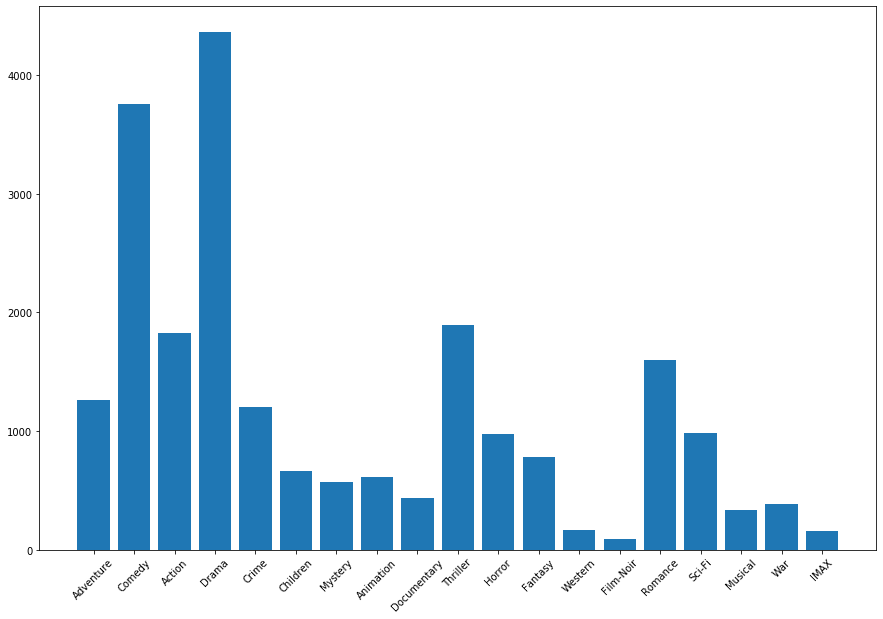

In [19]:
plt.figure(figsize = (15,10))
plt.xticks(rotation=45)
plt.bar(keys, values)

## Model Prepration

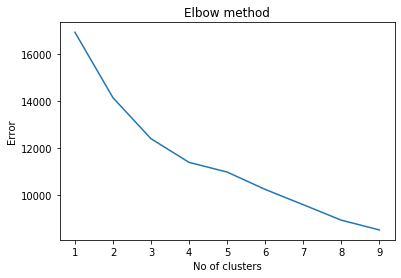

In [20]:
Error =[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i).fit(data1.iloc[:,2:])
    kmeans.fit(data1.iloc[:,2:])
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=5, random_state=0)

#### Inertia: Intuitively, inertia tells how far away the points within a cluster are.
#### Therefore, a small of inertia is aimed for. The range of inertia’s value starts
#### from zero and goes up.

In [22]:
y_kmeans = kmeans.fit_predict(data1.iloc[:,2:])

In [23]:
y_kmeans

array([2, 0, 2, ..., 1, 0, 2])

In [24]:
data1["clusters"] = y_kmeans

In [25]:
data1["clusters"].value_counts()

1    2652
2    2638
3    1816
0    1692
4     944
Name: clusters, dtype: int64

In [26]:
data1.head()

,movieId,title,Adventure,Comedy,Action,Drama,Crime,Children,Mystery,Animation,...,Horror,Fantasy,Western,Film-Noir,Romance,Sci-Fi,Musical,War,IMAX,clusters
0,1,Toy Story (1995),1,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,2
1,2,Jumanji (1995),1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
3,4,Waiting to Exhale (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
4,5,Father of the Bride Part II (1995),0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [27]:
data1_dict_clus = dict(data1["clusters"].value_counts())
data1_dict_clus

{1: 2652, 2: 2638, 3: 1816, 0: 1692, 4: 944}

In [28]:
keys = data1_dict_clus.keys()
values = data1_dict_clus.values()

## Plotting number of movies in each clusters

(-1.1114519700505532,
 1.1165204827063666,
 -1.110479706881616,
 1.1004990336610294)

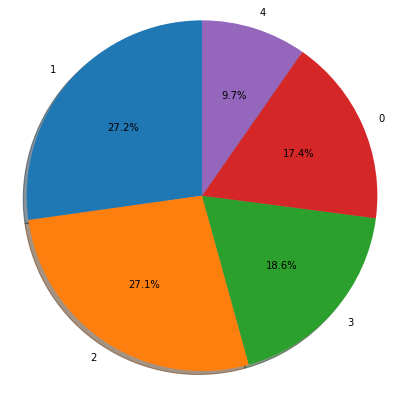

In [29]:
plt.figure(figsize = (7,7))
plt.pie(values, labels=keys, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')

In [30]:
kmeans_df = pd.DataFrame( { "num Clusters ":range(1, 10), "cluster errors":Error})
kmeans_df

,num Clusters,cluster errors
0,1,16936.836789
1,2,14143.790285
2,3,12395.613108
3,4,11386.449047
4,5,10974.185580
5,6,10234.135138
6,7,9582.027477
7,8,8922.440685
8,9,8505.808505


In [31]:
data2 = data1.copy()

In [32]:
data2 = data2.iloc[:,2:data1.shape[1]]

In [33]:
data2.head()

,Adventure,Comedy,Action,Drama,Crime,Children,Mystery,Animation,Documentary,Thriller,Horror,Fantasy,Western,Film-Noir,Romance,Sci-Fi,Musical,War,IMAX,clusters
0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,2
1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [34]:
new_df = data2.groupby("clusters").sum()

In [35]:
new_df

,Adventure,Comedy,Action,Drama,Crime,Children,Mystery,Animation,Documentary,Thriller,Horror,Fantasy,Western,Film-Noir,Romance,Sci-Fi,Musical,War,IMAX
clusters,,,,,,,,,,,,,,,,,,,
0,479,2,540,7,102,228,62,269,381,1,322,284,59,17,46,394,76,41,74
1,211,630,289,2652,298,90,97,58,19,0,61,115,40,23,0,109,75,224,22
2,345,2638,324,1,200,333,38,250,37,41,138,235,36,0,540,158,135,30,25
3,189,145,650,796,565,4,343,17,2,1816,451,81,18,41,66,296,2,38,35
4,39,341,25,905,34,9,33,17,1,36,6,64,14,6,944,23,46,49,2


In [36]:
final_result = pd.DataFrame(round((new_df.apply(lambda r: r/r.sum()*100, axis=1)),2))

## Cluster Profiling

In [37]:
final_result

,Adventure,Comedy,Action,Drama,Crime,Children,Mystery,Animation,Documentary,Thriller,Horror,Fantasy,Western,Film-Noir,Romance,Sci-Fi,Musical,War,IMAX
clusters,,,,,,,,,,,,,,,,,,,
0,14.15,0.06,15.96,0.21,3.01,6.74,1.83,7.95,11.26,0.03,9.52,8.39,1.74,0.50,1.36,11.64,2.25,1.21,2.19
1,4.21,12.57,5.77,52.90,5.94,1.80,1.93,1.16,0.38,0.00,1.22,2.29,0.80,0.46,0.00,2.17,1.50,4.47,0.44
2,6.27,47.93,5.89,0.02,3.63,6.05,0.69,4.54,0.67,0.74,2.51,4.27,0.65,0.00,9.81,2.87,2.45,0.55,0.45
3,3.40,2.61,11.70,14.33,10.17,0.07,6.17,0.31,0.04,32.69,8.12,1.46,0.32,0.74,1.19,5.33,0.04,0.68,0.63
4,1.50,13.15,0.96,34.89,1.31,0.35,1.27,0.66,0.04,1.39,0.23,2.47,0.54,0.23,36.39,0.89,1.77,1.89,0.08


In [38]:
collection_new_df = data1.groupby(["clusters"])["title"].sum()
collection_new_df = pd.DataFrame(collection_new_df)
collection_new_df

,title
clusters,
0,Jumanji (1995)Tom and Huck (1995)Sudden Death ...
1,Nixon (1995)Casino (1995)Powder (1995)Othello ...
2,Toy Story (1995)Grumpier Old Men (1995)Father ...
3,Heat (1995)GoldenEye (1995)Money Train (1995)G...
4,"Waiting to Exhale (1995)American President, Th..."


# Thankyou